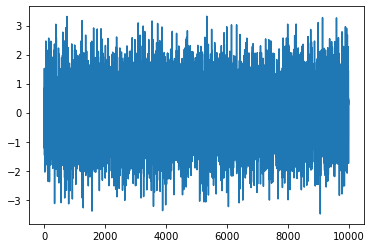

In [54]:
import numpy as np
from pymc3 import Normal
import matplotlib.pyplot as plt
%matplotlib inline

y = Normal.dist()
samples = y.random(size=10000)
plt.plot(samples)

-0.011052774023374703
0.9969311804954312


(array([  29.,  141.,  589., 1487., 2455., 2570., 1765.,  730.,  197.,
          37.]),
 array([-3.4866574 , -2.80602599, -2.12539459, -1.44476319, -0.76413179,
        -0.08350038,  0.59713102,  1.27776242,  1.95839382,  2.63902523,
         3.31965663]),
 <BarContainer object of 10 artists>)

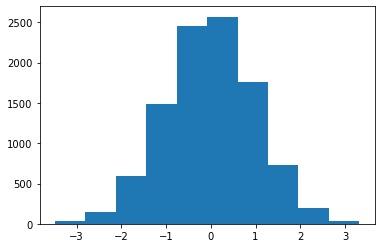

In [55]:
print(samples.mean())
print(samples.std())
plt.hist(samples)

In [56]:
import pandas as pd

In [57]:
precip = pd.read_csv("winemag-data_first150k_dev.csv")#, index_col=0, na_values='NA', delim_whitespace=True)
precip.head()

,country,points,price,province
0,France,99,2300,Bordeaux
1,US,91,2013,California
2,France,98,1900,Bordeaux
3,France,100,1400,Champagne
4,France,100,1400,Champagne


In [58]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='price'>

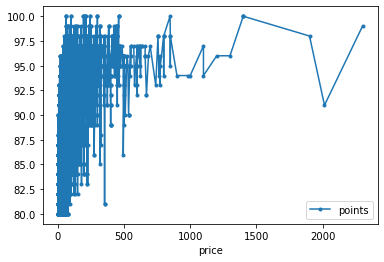

In [59]:
df = pd.DataFrame(precip)
df = df.sort_values('price')  # dict doesn't preserve order
df.plot(x='price', y='points', marker='.')

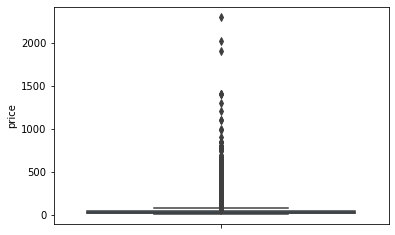

In [60]:
import seaborn as sns
k=sns.boxplot(y=df['price'])

In [61]:
# quantiles = k.quantile([0.01, 0.25, 0.5, 0.75, 0.99])

<AxesSubplot:xlabel='price'>

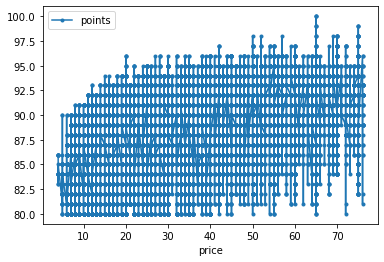

In [62]:
cols = ["price"] # one or more

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
df.plot(x='price', y='points', marker='.')

array([[<AxesSubplot:title={'center':'points'}>,
        <AxesSubplot:title={'center':'price'}>]], dtype=object)

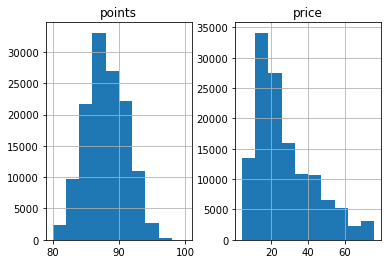

In [83]:
df.hist()

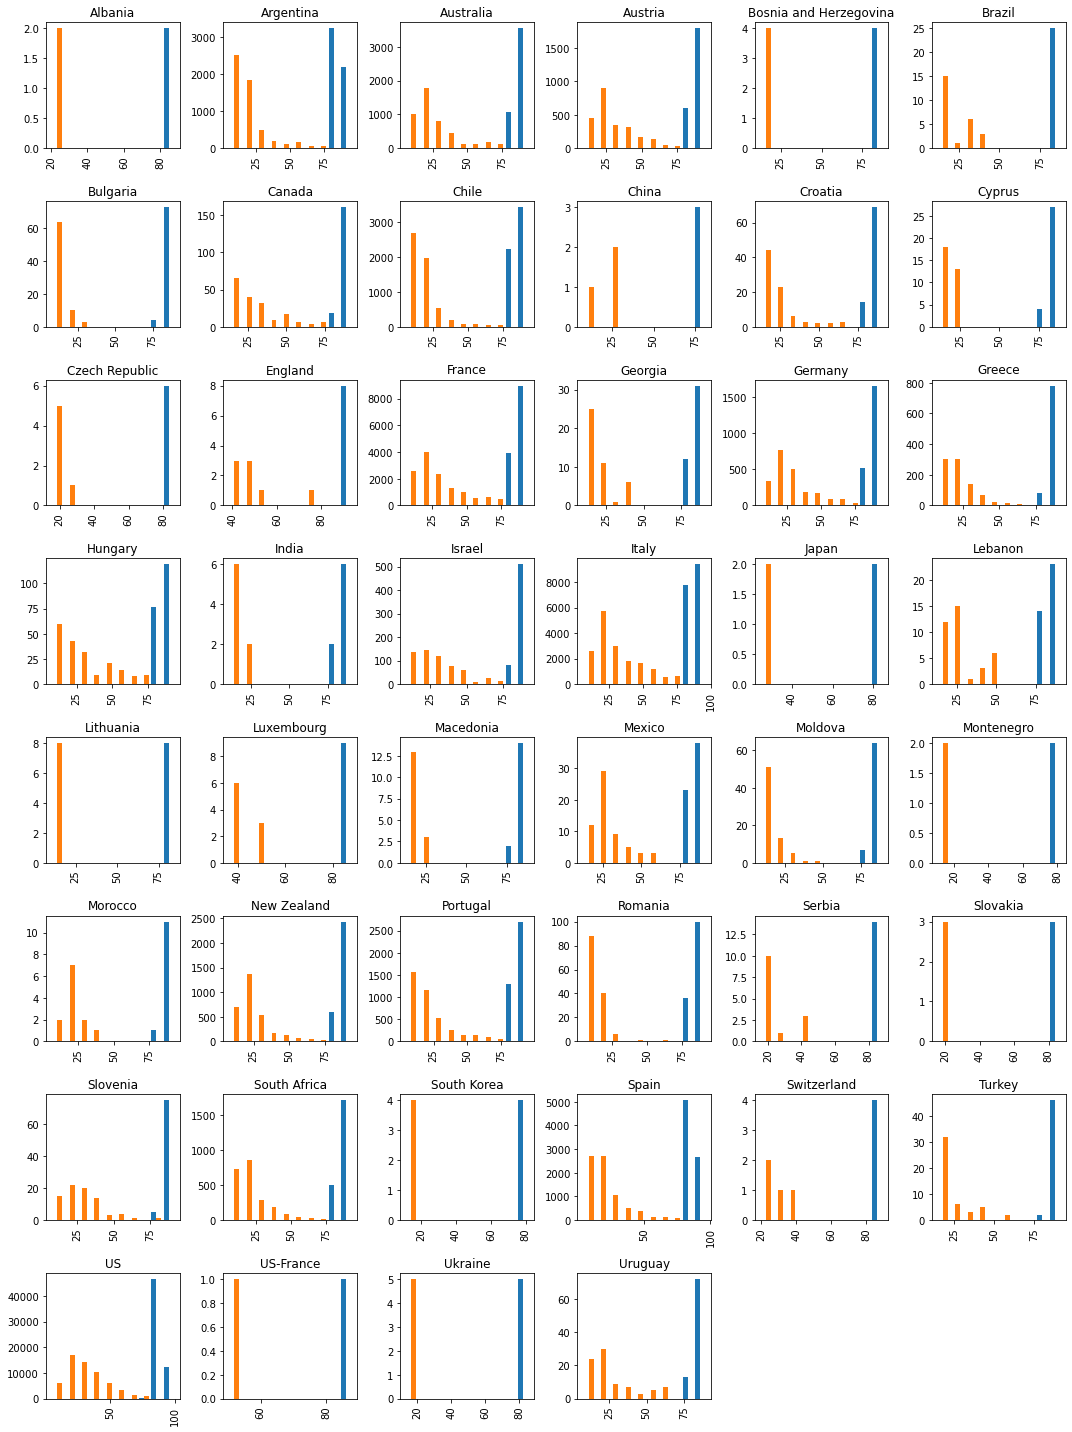

In [92]:
_ = df.hist(by="country",layout=(8, 6), figsize=(15, 20))
# plt.tight_layout()
plt.tight_layout()

country
Albania                   AxesSubplot(0.125,0.125;0.775x0.755)
Argentina                 AxesSubplot(0.125,0.125;0.775x0.755)
Australia                 AxesSubplot(0.125,0.125;0.775x0.755)
Austria                   AxesSubplot(0.125,0.125;0.775x0.755)
Bosnia and Herzegovina    AxesSubplot(0.125,0.125;0.775x0.755)
Brazil                    AxesSubplot(0.125,0.125;0.775x0.755)
Bulgaria                  AxesSubplot(0.125,0.125;0.775x0.755)
Canada                    AxesSubplot(0.125,0.125;0.775x0.755)
Chile                     AxesSubplot(0.125,0.125;0.775x0.755)
China                     AxesSubplot(0.125,0.125;0.775x0.755)
Croatia                   AxesSubplot(0.125,0.125;0.775x0.755)
Cyprus                    AxesSubplot(0.125,0.125;0.775x0.755)
Czech Republic            AxesSubplot(0.125,0.125;0.775x0.755)
England                   AxesSubplot(0.125,0.125;0.775x0.755)
France                    AxesSubplot(0.125,0.125;0.775x0.755)
Georgia                   AxesSubplot(0.125,0.1

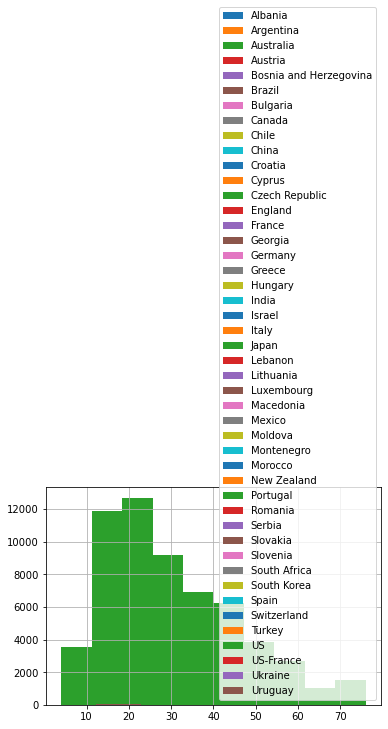

In [71]:
df.groupby('country')["price"].hist(legend = True)
# df.groupby('species')['sepal_length'].hist(alpha=0.7,label='species')
# plt.legend()

TypeError: hist() got multiple values for argument 'x'

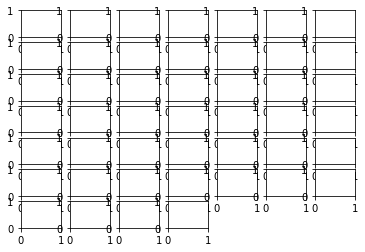

In [76]:
df.hist(x='price',y='points',by='country')
# plt.tight_layout()